<a href="https://colab.research.google.com/github/cleysonl/Pytorch/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Recognition - PyTorch**

In [1]:
!pip install torch torchvision

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [0]:
# Chain transformations 
# 1)transforms.ToTensor(): Convert our numpy array in the range of 0 to 256 to a tensor in a range of 0 to 1
# 2)transforms.Normalize: Normalize the values for each tensor of image size, channel, height and width. Change the range from 0 to 1 to -1 to 1
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ),(0.5, ))
                                ])
training_dataset = datasets.MNIST(root='./data', train=True, download = True, transform=transform)
# Training loader is used to divide the dataset in batches
training_loader = torch.utils.data.DataLoader(dataset= training_dataset, batch_size=100, shuffle=True)

In [0]:
# Plot a tensor image (color, width, height)
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  # transpose to (width,height, color)
  image = image.transpose(1, 2, 0)
  print(image.shape)
  # image = image * np.array((0.5, )) + np.array((0.5, ))
  # We need to get rid of the third dimension 
  image = image[:,:,0]
  # To ensure that the range of the image is between 0 and 1
  image = image.clip(0,1)
  return image

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


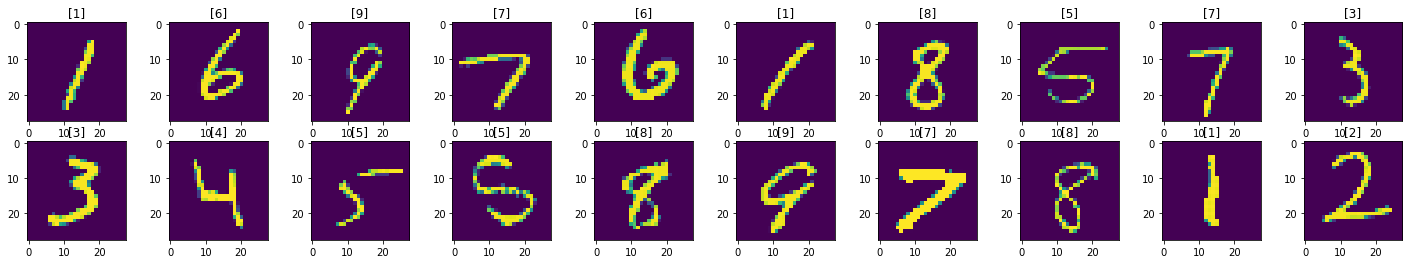

In [5]:
dataiter= iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize = (25,4))

for idx in np.arange(20):
  ax= fig.add_subplot(2, 10, idx+1)
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [0]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1= nn.Linear(D_in, H1)
    self.linear2= nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
  def forward(self, x):
    x= F.relu(self.linear1(x))
    x= F.relu(self.linear2(x))
    x= self.linear3(x)
    return x

# 28*28 = 784 (size of the image)
model = Classifier(784,125,65,10)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [8]:
epochs = 12
# List to save the losses for each epoch
running_loss_history = []
running_corrects_history = []

for i in range(epochs):
  # Variable used to acummulate the losses for each batch in an epoch
  running_loss = 0.0
  running_corrects = 0.0


  for inputs, labels in training_loader: 
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs,1)
    running_corrects += torch.sum(preds == labels.data)

    running_loss += loss.item()
  else:
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    print('Training loss: {:.4f}, {:.4f}'.format(epoch_loss, epoch_acc.item()))


Training loss: 0.4248, 87.2167
Training loss: 0.1969, 94.0383
Training loss: 0.1435, 95.6650
Training loss: 0.1179, 96.3700
Training loss: 0.0965, 96.9683
Training loss: 0.0853, 97.3467
Training loss: 0.0767, 97.5433
Training loss: 0.0679, 97.8567
Training loss: 0.0584, 98.1433
Training loss: 0.0552, 98.1517
Training loss: 0.0507, 98.3100
Training loss: 0.0462, 98.4950


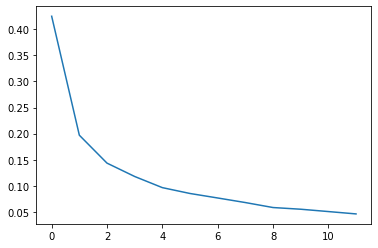

In [9]:
plt.plot(running_loss_history, label = 'training loss')